In [1]:
fileIn = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/tweetsrentaf.csv"
import pandas as pd
df = pd.read_csv(fileIn)
len(df)

94206

Acaba de publicar

In [2]:
acabadepublicar=[]
foto=[]
video=[]
cadenafoto = "acaba de publicar una foto" # 1
cadenavideo ="acaba de publicar un vídeo" # 2
cadenavideo2 ="acaba de publicar un video" # 3

for n,row in df.iterrows():
    s = row["text"].lower()
    if s.startswith(cadenafoto):
        acabadepublicar.append(1)
        foto.append(1)
        video.append(0)
    elif s.startswith(cadenavideo) or s.startswith(cadenavideo2):
        acabadepublicar.append(1)
        video.append(1)
        foto.append(0)
    else:
        acabadepublicar.append(0)
        video.append(0)
        foto.append(0)
df["acabadepublicar"] = acabadepublicar
df["foto"] = foto
df["video"] = video

In [3]:
exccerrar=[]
intcerrar=[]
excabrir=[]
intabrir=[]
menciones=[]
hashtags=[]

for n,row in df.iterrows():
    s = row["text"]
    exccerrar.append(s.count("!"))
    intcerrar.append(s.count("?"))
    excabrir.append(s.count("¡"))
    intabrir.append(s.count("¿"))
    menciones.append(s.count("@"))
    hashtags.append(s.count("#"))
df["exccerrar"] = exccerrar
df["intcerrar"] = intcerrar
df["excabrir"] = excabrir
df["intabrir"] = intabrir
df["menciones"] = menciones
df["hashtags"] = hashtags
df

,userid,_id,screen_name,created_at,text,acabadepublicar,foto,video,exccerrar,intcerrar,excabrir,intabrir,menciones,hashtags
0,372826254,1491110664240533504,heryartes,2022-02-08T18:04:20.000Z,Dios siempre da por donde más le duele a uno. ...,0,0,0,0,0,0,0,0,0
1,372826254,1491116058916184065,heryartes,2022-02-08T18:25:46.000Z,Acaba de publicar un video en Telemicro https:...,1,0,1,0,0,0,0,0,0
2,372826254,1491121778416136202,heryartes,2022-02-08T18:48:30.000Z,Acaba de publicar un video https://t.co/wAwqtD...,1,0,1,0,0,0,0,0,0
3,372826254,1448291132463587337,heryartes,2021-10-13T14:14:48.000Z,Yo tenia varios días sin escuchar una emisora ...,0,0,0,3,1,0,0,1,0
4,372826254,1448294476733112321,heryartes,2021-10-13T14:28:05.000Z,"Facebook lleno de puyas e indirectas, Twitter ...",0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94201,1069569979,1488472824272474117,gerson_iglesias,2022-02-01T11:22:30.000Z,Acaba de publicar una foto en Oca Vila de Alla...,1,1,0,0,0,0,0,0,0
94202,840287644789723138,1488505529714581517,RococoDecora,2022-02-01T13:32:28.000Z,Preciosidad para comedor https://t.co/vpPH5SLh5W,0,0,0,0,0,0,0,0,0
94203,1974659378,1488541398982967296,sr_boca,2022-02-01T15:54:59.000Z,Merienda https://t.co/ID9gthKcB5,0,0,0,0,0,0,0,0,0
94204,1553476147,1490968743136137217,MuchoFunkSpain,2022-02-08T08:40:23.000Z,Acaba de publicar una foto en Mucho Funk https...,1,1,0,0,0,0,0,0,0


In [4]:
import re
try:
    import emoji
    print("emoji está en el sistema!")
except ImportError as e:
    !{sys.executable} -m pip install emoji --upgrade
    import emoji


#número de palabras del texto
numPalabras=[]
#longitud media de las palabras del texto
longMedia=[]
#numero de mayusculas del texto
numMayus=[]
#numero de URLs del texto
numURLS=[]
#numero de emojis del texto
numEmojis=[]


cadenafoto = "Acaba de publicar una foto" # 1
cadenavideo ="Acaba de publicar un vídeo" # 2
cadenavideo2 ="Acaba de publicar un video" # 3

for n,row in df.iterrows():
    s = row["text"]    

    if s.startswith(cadenafoto) or s.startswith( cadenavideo) or s.startswith(cadenavideo2):
        numPalabras.append(0)
        numMayus.append(0)
        numURLS.append(0)
        longMedia.append(0)
        numEmojis.append(0)


    else:
        lemojis = emoji.get_emoji_regexp().findall(s)
        numEmojisText=len(lemojis)#cuento emojis
        #print(s,'\n',numEmojisText)
        texto_sin_emojis= emoji.get_emoji_regexp().sub(r'', s)
        spliteado = texto_sin_emojis.split()
        numURLSText=len(list(x for x in spliteado if x.startswith('https')))#cuento urls


        texto_sin_emojis_urls_hashtags_arroba=" ".join(x for x in spliteado if not (x.startswith('https') or  x.startswith('#') or  x.startswith('@')))#elimino urls
        lista_palabras = re.sub("[^\w]", " ",  texto_sin_emojis_urls_hashtags_arroba).split() #separo las palabras en una lista

        #las comas, hipervinculos... no son palabras
        #¡duda! ¿hashtags,arroba?
        numMayusText=len(list(x for x in  texto_sin_emojis_urls_hashtags_arroba if x.isupper()))#cuento mayusculas
        longitudTotal=sum(list(len(x) for x in  lista_palabras ))#cuento longitudes
        if( len(lista_palabras)==0):
            longMedia.append(0)
        else:
            longMedia.append(longitudTotal/len(lista_palabras))
            #print(longitudTotal/len(lista_palabras))



        numPalabrasText = len(lista_palabras)
        numPalabras.append(numPalabrasText)
        numMayus.append(numMayusText)
        numURLS.append(numURLSText)
        numEmojis.append(numEmojisText)
        #print(numPalabrasText)
        #print(numMayusText)
        #print(numURLSText)   


df["numPalabras"] = numPalabras
df["longMedia"] = longMedia
df["numMayus"] = numMayus
df["numURLS"]=numURLS
df["numEmojis"]=numEmojis

emoji está en el sistema!


In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
df

,userid,_id,screen_name,created_at,text,acabadepublicar,foto,video,exccerrar,intcerrar,excabrir,intabrir,menciones,hashtags,numPalabras,longMedia,numMayus,numURLS,numEmojis
0,372826254,1491110664240533504,heryartes,2022-02-08T18:04:20.000Z,Dios siempre da por donde más le duele a uno. No en lo económico; sino en lo espiritual y sentimental.,0,0,0,0,0,0,0,0,0,20,4.000000,2,0,0
1,372826254,1491116058916184065,heryartes,2022-02-08T18:25:46.000Z,Acaba de publicar un video en Telemicro https://t.co/mfapTrEhHB,1,0,1,0,0,0,0,0,0,0,0.000000,0,0,0
2,372826254,1491121778416136202,heryartes,2022-02-08T18:48:30.000Z,Acaba de publicar un video https://t.co/wAwqtDfdIR,1,0,1,0,0,0,0,0,0,0,0.000000,0,0,0
3,372826254,1448291132463587337,heryartes,2021-10-13T14:14:48.000Z,"Yo tenia varios días sin escuchar una emisora que por años escuché, intento otra vez, pero coño Hartan! Jartan!! Con lo de la vacuna... @z101digital van a tener que colocar merengue para volver a ser líder en audiencia o música haitiana. Cuánto les pagan?",0,0,0,3,1,0,0,1,0,43,4.418605,5,0,0
4,372826254,1448294476733112321,heryartes,2021-10-13T14:28:05.000Z,"Facebook lleno de puyas e indirectas, Twitter de Egocéntricos o presumidos, Youtube de personas que desean enseñar o educar. En 9 años trabajando por internet.¡Agradezco a Google y a Youtube!",0,0,0,1,0,1,0,0,0,31,5.032258,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94201,1069569979,1488472824272474117,gerson_iglesias,2022-02-01T11:22:30.000Z,"Acaba de publicar una foto en Oca Vila de Allariz Hotel &amp; Spa, Allariz https://t.co/asqU5WRYsI",1,1,0,0,0,0,0,0,0,0,0.000000,0,0,0
94202,840287644789723138,1488505529714581517,RococoDecora,2022-02-01T13:32:28.000Z,Preciosidad para comedor https://t.co/vpPH5SLh5W,0,0,0,0,0,0,0,0,0,3,7.333333,1,1,0
94203,1974659378,1488541398982967296,sr_boca,2022-02-01T15:54:59.000Z,Merienda https://t.co/ID9gthKcB5,0,0,0,0,0,0,0,0,0,1,8.000000,1,1,0
94204,1553476147,1490968743136137217,MuchoFunkSpain,2022-02-08T08:40:23.000Z,Acaba de publicar una foto en Mucho Funk https://t.co/9nptFl8ILY,1,1,0,0,0,0,0,0,0,0,0.000000,0,0,0


In [7]:
df.describe()

,userid,_id,acabadepublicar,foto,video,exccerrar,intcerrar,excabrir,intabrir,menciones,hashtags,numPalabras,longMedia,numMayus,numURLS,numEmojis
count,9.420600e+04,9.420600e+04,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000,94206.000000
mean,1.163448e+17,1.470176e+18,0.142210,0.128187,0.014022,0.171677,0.091969,0.026400,0.037418,0.272721,0.642369,12.684107,3.929153,3.794588,0.497176,0.638834
std,3.370046e+17,1.256157e+16,0.349267,0.334300,0.117584,0.781619,0.466728,0.206094,0.219362,0.790456,1.829185,11.641143,2.219775,7.201190,0.555777,1.927417
min,6.173830e+05,9.611554e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.480768e+08,1.461407e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.666667,1.000000,0.000000,0.000000
50%,3.274324e+08,1.470801e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.294118,2.000000,0.000000,0.000000
75%,1.102229e+09,1.479612e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,4.842105,4.000000,1.000000,0.000000
max,1.437048e+18,1.491126e+18,1.000000,1.000000,1.000000,42.000000,22.000000,6.000000,7.000000,15.000000,30.000000,66.000000,280.000000,231.000000,6.000000,117.000000


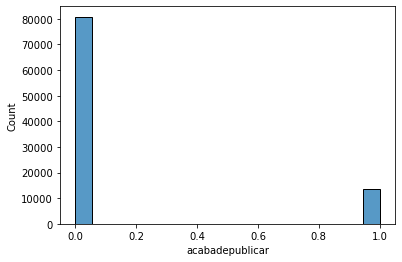

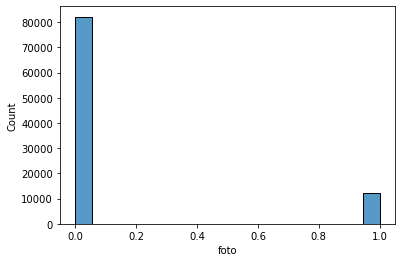

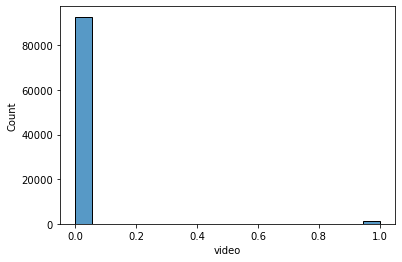

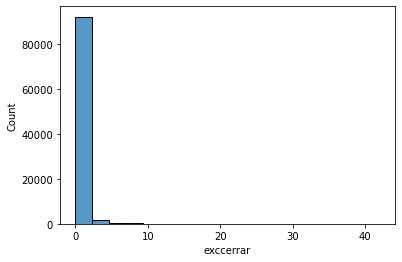

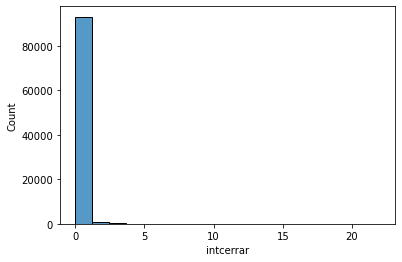

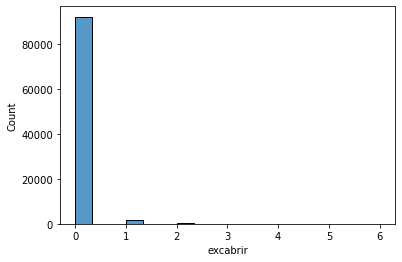

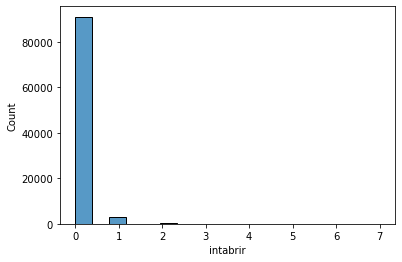

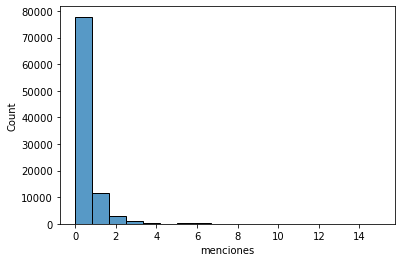

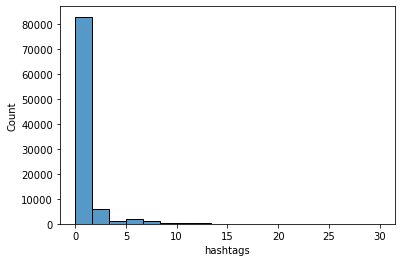

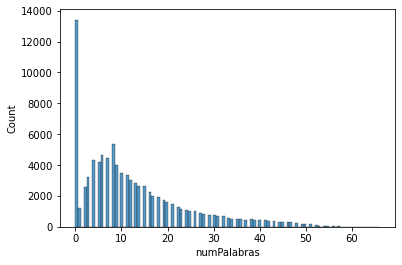

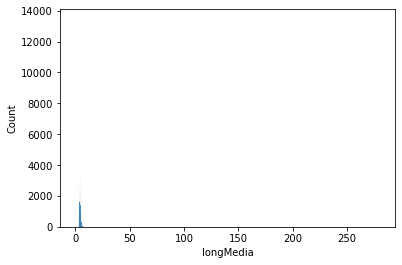

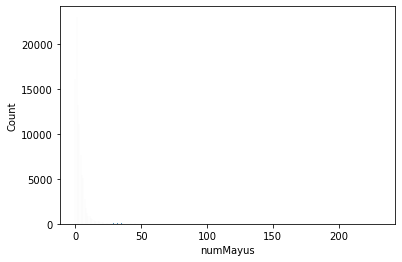

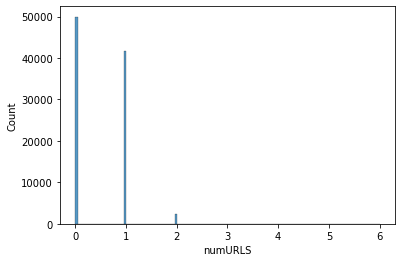

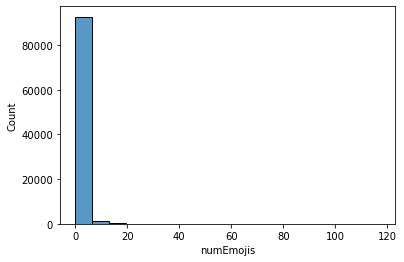

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
c = list(df.columns)
for i in range(5,len(c)):
    sns.histplot(data=df, x=c[i])
    plt.show()

In [9]:
pip install flair

Note: you may need to restart the kernel to use updated packages.


In [10]:

from flair.models import TextClassifier
from flair.data import Sentence
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-spanish-large")
classifier = TextClassifier.load('en-sentiment')

def sentimiento(classifier, s):
    # make a sentence
    sentence = Sentence(s)
    classifier.predict(sentence)
    return sentence.labels[0].to_dict()

2022-03-19 14:15:07,953 loading file C:\Users\noeli\.flair\models\ner-spanish-large\045ad6c7dc21e0eb85935dce0544eec65f8c63c58412154df4dee7ff5f11665b.d4d3456316d2951bc100d060bd63a690b33af6d273adffa1b90df32328ed3257
2022-03-19 14:15:23,245 loading file C:\Users\noeli\.flair\models\sentiment-en-mix-distillbert_4.pt


In [11]:
fileEmoji2 = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/emojis_sentimiento.csv"
dfEmoji2 = pd.read_csv(fileEmoji2)
sentimientoPosNeg=[]
confianzaSentimiento=[]


for n,row in dfEmoji2.iterrows():
    s = row["Other Keywords"].lower()
    sent = sentimiento(classifier,s)
    sentimientoPosNeg.append(sent["value"])
    confianzaSentimiento.append(sent['confidence'])
   
dfEmoji2["sentimiento"] = sentimientoPosNeg
dfEmoji2["confianzaSentimiento"] = confianzaSentimiento

#path = "./"
#fileOut2 = path+"emojis_sentimiento.csv"
#dfEmoji2.to_csv(fileOut2,index=False)

In [12]:
dfEmoji2[dfEmoji2.sentimiento=="NEGATIVE"].head(30)

,Emo,CLDR Short Name,Other Keywords,theme,category,№,Code,sentimiento,confianzaSentimiento
9,🙃,upside-down face,face | upside-down,Smileys & Emotion,face-smiling,10,U+1F643,NEGATIVE,0.999377
25,😝,squinting face with tongue,eye | face | horrible | squinting face with tongue | taste | tongue,Smileys & Emotion,face-tongue,26,U+1F61D,NEGATIVE,0.999988
26,🤑,money-mouth face,face | money | money-mouth face | mouth,Smileys & Emotion,face-tongue,27,U+1F911,NEGATIVE,0.997914
29,🤫,shushing face,quiet | shush | shushing face,Smileys & Emotion,face-hand,30,U+1F92B,NEGATIVE,0.993860
31,🤐,zipper-mouth face,face | mouth | zipper | zipper-mouth face,Smileys & Emotion,face-neutral-skeptical,32,U+1F910,NEGATIVE,0.983443
32,🤨,face with raised eyebrow,distrust | face with raised eyebrow | skeptic | disapproval | disbelief | mild surprise | scepticism,Smileys & Emotion,face-neutral-skeptical,33,U+1F928,NEGATIVE,0.983782
33,😐,neutral face,deadpan | face | meh | neutral,Smileys & Emotion,face-neutral-skeptical,34,U+1F610,NEGATIVE,0.999861
34,😑,expressionless face,expressionless | face | inexpressive | meh | unexpressive,Smileys & Emotion,face-neutral-skeptical,35,U+1F611,NEGATIVE,0.999975
35,😶,face without mouth,face | face without mouth | mouth | quiet | silent,Smileys & Emotion,face-neutral-skeptical,36,U+1F636,NEGATIVE,0.703373
37,😒,unamused face,face | unamused | unhappy,Smileys & Emotion,face-neutral-skeptical,38,U+1F612,NEGATIVE,0.999911


In [13]:
# sentimiento de los emoticonos (media de los sentimientos)
try:
    import emoji
    print("emoji está en el sistema!")
except ImportError as e:
    !{sys.executable} -m pip install emoji --upgrade
    import emoji
sentimientoNegEmojis=[]
confianzaSentimientoNeg=[]
sentimientoPosEmojis=[]
confianzaSentimientoPos=[]


for n,row in df.iterrows():
    totalNeg=0
    totalPos=0
    totalConfianzaNeg=0
    totalConfianzaPos=0
    numEmojis=0


    s = row["text"]    
    lemojis = list(emoji.get_emoji_regexp().findall(s))
    for i in lemojis:
        s2 = str(bytes(i, encoding="raw_unicode_escape"))
        
        index=s2.find("\\")
        s3=s2[index:len(s2)-1]
        
        
        cadena=""
        while(s3.find("\\")!=-1):
            indice=0
            s3=s3[3:]
            while(s3[indice]=='0'):
                indice+=1
            s3=s3[indice:]
            index2=s3.find("\\")
            if(index2!=-1):
                cadena+='U+'+s3[:index2].upper()+' '
            else:
                cadena+='U+'+s3.upper()
            s3=s3[index2:]
        
        
            
            
        rows = dfEmoji2[dfEmoji2.Code==cadena]
        
        if(len(rows)>0): #encuentra directamente nuestra cadena
            it=rows.iterrows()
            n,row=next(it)
            if(row["sentimiento"] == "NEGATIVE"):
                totalNeg+=1
                totalConfianzaNeg+=row["confianzaSentimiento"] 
            else:
                totalPos+=1
                totalConfianzaPos+=row["confianzaSentimiento"]  
            numEmojis+=1


            
        else:
            index3=cadena.find(' ')
            rows = dfEmoji2[dfEmoji2.Code==cadena[:index3]]
            if (len(rows)>0): #encuentra parte de nuestra cadena
                it=rows.iterrows()
                n,row=next(it)
                if(row["sentimiento"] == "NEGATIVE"):
                    totalNeg+=1
                    totalConfianzaNeg+=row["confianzaSentimiento"] 
                else:
                    totalPos+=1
                    totalConfianzaPos+=row["confianzaSentimiento"]  
                numEmojis+=1
                
                
            else:
                if(cadena=="U+FE0F U+20E3"):#es un número

                    rows = dfEmoji2[dfEmoji2.Code=="U+0039 U+FE0F U+20E3"]      
                    it=rows.iterrows()
                    n,row=next(it)
                    if(row["sentimiento"] == "NEGATIVE"):
                        totalNeg+=1
                        totalConfianzaNeg+=row["confianzaSentimiento"] 
                    else:
                        totalPos+=1
                        totalConfianzaPos+=row["confianzaSentimiento"] 
                    numEmojis+=1
                    
                 #lo demás son emojis raros que no están en unicode
                 #144 emojis no encontrados  en 34086 tweets

                #else:
                #    print('\n')
                #    print(s2,'|',cadena)
                #    print("__________________no enc__________________:",i)
                #    print('\n')



    if(totalNeg>0):
        sentimientoNegEmojis.append(totalNeg/numEmojis)
        confianzaSentimientoNeg.append(totalConfianzaNeg/totalNeg)
    else:
        sentimientoNegEmojis.append(0)
        confianzaSentimientoNeg.append(0)
    if(totalPos>0):
        sentimientoPosEmojis.append(totalPos/numEmojis)
        confianzaSentimientoPos.append(totalConfianzaPos/totalPos)

    else:
        sentimientoPosEmojis.append(0)
        confianzaSentimientoPos.append(0)


df["sentimientoPosEmojis"] = sentimientoPosEmojis
df["confianzaSentimientoPos"] = confianzaSentimientoPos
df["sentimientoNegEmojis"] = sentimientoNegEmojis
df["confianzaSentimientoNeg"] = confianzaSentimientoNeg
    
        

emoji está en el sistema!


In [14]:
df

,userid,_id,screen_name,created_at,text,acabadepublicar,foto,video,exccerrar,intcerrar,...,hashtags,numPalabras,longMedia,numMayus,numURLS,numEmojis,sentimientoPosEmojis,confianzaSentimientoPos,sentimientoNegEmojis,confianzaSentimientoNeg
0,372826254,1491110664240533504,heryartes,2022-02-08T18:04:20.000Z,Dios siempre da por donde más le duele a uno. No en lo económico; sino en lo espiritual y sentimental.,0,0,0,0,0,...,0,20,4.000000,2,0,0,0.0,0.0,0.0,0.0
1,372826254,1491116058916184065,heryartes,2022-02-08T18:25:46.000Z,Acaba de publicar un video en Telemicro https://t.co/mfapTrEhHB,1,0,1,0,0,...,0,0,0.000000,0,0,0,0.0,0.0,0.0,0.0
2,372826254,1491121778416136202,heryartes,2022-02-08T18:48:30.000Z,Acaba de publicar un video https://t.co/wAwqtDfdIR,1,0,1,0,0,...,0,0,0.000000,0,0,0,0.0,0.0,0.0,0.0
3,372826254,1448291132463587337,heryartes,2021-10-13T14:14:48.000Z,"Yo tenia varios días sin escuchar una emisora que por años escuché, intento otra vez, pero coño Hartan! Jartan!! Con lo de la vacuna... @z101digital van a tener que colocar merengue para volver a ser líder en audiencia o música haitiana. Cuánto les pagan?",0,0,0,3,1,...,0,43,4.418605,5,0,0,0.0,0.0,0.0,0.0
4,372826254,1448294476733112321,heryartes,2021-10-13T14:28:05.000Z,"Facebook lleno de puyas e indirectas, Twitter de Egocéntricos o presumidos, Youtube de personas que desean enseñar o educar. En 9 años trabajando por internet.¡Agradezco a Google y a Youtube!",0,0,0,1,0,...,0,31,5.032258,8,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94201,1069569979,1488472824272474117,gerson_iglesias,2022-02-01T11:22:30.000Z,"Acaba de publicar una foto en Oca Vila de Allariz Hotel &amp; Spa, Allariz https://t.co/asqU5WRYsI",1,1,0,0,0,...,0,0,0.000000,0,0,0,0.0,0.0,0.0,0.0
94202,840287644789723138,1488505529714581517,RococoDecora,2022-02-01T13:32:28.000Z,Preciosidad para comedor https://t.co/vpPH5SLh5W,0,0,0,0,0,...,0,3,7.333333,1,1,0,0.0,0.0,0.0,0.0
94203,1974659378,1488541398982967296,sr_boca,2022-02-01T15:54:59.000Z,Merienda https://t.co/ID9gthKcB5,0,0,0,0,0,...,0,1,8.000000,1,1,0,0.0,0.0,0.0,0.0
94204,1553476147,1490968743136137217,MuchoFunkSpain,2022-02-08T08:40:23.000Z,Acaba de publicar una foto en Mucho Funk https://t.co/9nptFl8ILY,1,1,0,0,0,...,0,0,0.000000,0,0,0,0.0,0.0,0.0,0.0


In [15]:
from datetime import datetime
from datetime import time

horas=[]

# hora a la que se emite el tweet
for n,row in df.iterrows():
    s = row["created_at"]
    fecha_dt = datetime.strptime(s, '%Y-%m-%dT%H:%M:%S.000Z')
    hora = "%s" % (fecha_dt.time())
    horas.append(hora)

df["hora"] = horas
df

,userid,_id,screen_name,created_at,text,acabadepublicar,foto,video,exccerrar,intcerrar,...,numPalabras,longMedia,numMayus,numURLS,numEmojis,sentimientoPosEmojis,confianzaSentimientoPos,sentimientoNegEmojis,confianzaSentimientoNeg,hora
0,372826254,1491110664240533504,heryartes,2022-02-08T18:04:20.000Z,Dios siempre da por donde más le duele a uno. No en lo económico; sino en lo espiritual y sentimental.,0,0,0,0,0,...,20,4.000000,2,0,0,0.0,0.0,0.0,0.0,18:04:20
1,372826254,1491116058916184065,heryartes,2022-02-08T18:25:46.000Z,Acaba de publicar un video en Telemicro https://t.co/mfapTrEhHB,1,0,1,0,0,...,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,18:25:46
2,372826254,1491121778416136202,heryartes,2022-02-08T18:48:30.000Z,Acaba de publicar un video https://t.co/wAwqtDfdIR,1,0,1,0,0,...,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,18:48:30
3,372826254,1448291132463587337,heryartes,2021-10-13T14:14:48.000Z,"Yo tenia varios días sin escuchar una emisora que por años escuché, intento otra vez, pero coño Hartan! Jartan!! Con lo de la vacuna... @z101digital van a tener que colocar merengue para volver a ser líder en audiencia o música haitiana. Cuánto les pagan?",0,0,0,3,1,...,43,4.418605,5,0,0,0.0,0.0,0.0,0.0,14:14:48
4,372826254,1448294476733112321,heryartes,2021-10-13T14:28:05.000Z,"Facebook lleno de puyas e indirectas, Twitter de Egocéntricos o presumidos, Youtube de personas que desean enseñar o educar. En 9 años trabajando por internet.¡Agradezco a Google y a Youtube!",0,0,0,1,0,...,31,5.032258,8,0,0,0.0,0.0,0.0,0.0,14:28:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94201,1069569979,1488472824272474117,gerson_iglesias,2022-02-01T11:22:30.000Z,"Acaba de publicar una foto en Oca Vila de Allariz Hotel &amp; Spa, Allariz https://t.co/asqU5WRYsI",1,1,0,0,0,...,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,11:22:30
94202,840287644789723138,1488505529714581517,RococoDecora,2022-02-01T13:32:28.000Z,Preciosidad para comedor https://t.co/vpPH5SLh5W,0,0,0,0,0,...,3,7.333333,1,1,0,0.0,0.0,0.0,0.0,13:32:28
94203,1974659378,1488541398982967296,sr_boca,2022-02-01T15:54:59.000Z,Merienda https://t.co/ID9gthKcB5,0,0,0,0,0,...,1,8.000000,1,1,0,0.0,0.0,0.0,0.0,15:54:59
94204,1553476147,1490968743136137217,MuchoFunkSpain,2022-02-08T08:40:23.000Z,Acaba de publicar una foto en Mucho Funk https://t.co/9nptFl8ILY,1,1,0,0,0,...,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,08:40:23


In [16]:
df[df.sentimientoNegEmojis>0].tail(20)

,userid,_id,screen_name,created_at,text,acabadepublicar,foto,video,exccerrar,intcerrar,...,numPalabras,longMedia,numMayus,numURLS,numEmojis,sentimientoPosEmojis,confianzaSentimientoPos,sentimientoNegEmojis,confianzaSentimientoNeg,hora
93540,609851272,1471929015334281224,JuanMeloja,2021-12-17T19:43:19.000Z,"Los de @Virgintelco son unos inútiles totales.\nMe dejan sin linea.\nLlamo a las 9 para que me la devuelvan.\nMe dicen que me la mandan a casa. Todo ok.\nMe dicen que me llega en 48horas. \nLes llamo a las 9:30, hablo con logística para que me lo anulen 👇🏻Sigue",0,0,0,0,0,...,51,3.588235,8,0,1,0.000000,0.000000,1.000000,0.833022,19:43:19
93547,75890881,1472030056407093251,Festiman_,2021-12-18T02:24:49.000Z,Hoy he visto por fin en vivo a @raquelsastrecom en @ClanCabaret y aparte de divertida es más maja que las pesetas! Gracias por hacernos reír! 🧕🏻 https://t.co/biS43fPwqo,0,0,0,2,0,...,23,3.782609,2,1,1,0.000000,0.000000,1.000000,0.647837,02:24:49
93555,2880098614,1484281492037636099,Saraa_2507,2022-01-20T21:47:38.000Z,"El mejor regalo, sin duda, un musical\nMe dirás que no 🙃 @Jpl_2208",0,0,0,0,0,...,11,3.727273,2,0,1,0.000000,0.000000,1.000000,0.999377,21:47:38
93559,307789894,1473447946066800642,yasminreads_,2021-12-22T00:19:00.000Z,Se me acaba de antojar un McFlurry de filipinos 🥺🥺....,0,0,0,0,0,...,9,4.333333,3,0,2,0.000000,0.000000,1.000000,0.799465,00:19:00
93580,534387391,1484830996939907092,chaches64,2022-01-22T10:11:11.000Z,"Si tienes que trabajar el fin de semana, no queda otra que adelantar comidas!! 🤷🏻‍♀️ @thermomixlleidaiandorra en Lleida Cataluña https://t.co/hHF14gurgQ",0,0,0,2,0,...,17,4.588235,3,1,1,0.000000,0.000000,1.000000,0.999580,10:11:11
93605,581914226,1482769981674647552,Raulito_1995,2022-01-16T17:41:26.000Z,🍁 en El Retiro - Jardines del Buen Retiro de Madrid https://t.co/kIBgXdNtMj,0,0,0,0,0,...,9,4.333333,6,1,1,0.000000,0.000000,1.000000,0.962845,17:41:26
93654,1100923696359845889,1476121935423557632,EMERSON_EER,2021-12-29T09:24:29.000Z,"#emersoneduardorodrigues #elclavinguadalajara #elclavin #guadalajaraespaña #guadalajara #spain #nieve #nieve❄⛄ #2020 en El Clavín, Guadalajara https://t.co/IeCRA9D9Bt",0,0,0,0,0,...,4,5.250000,3,1,2,0.500000,0.883855,0.500000,0.767161,09:24:29
94083,272520203,1490474637326704642,12mariiiiaa,2022-02-06T23:56:59.000Z,Me encanta que a la hora de dormir mi cabeza se ponga a cien por hora y no me deje 🙄🙄🙄,0,0,0,0,0,...,20,3.150000,1,0,3,0.000000,0.000000,1.000000,0.982775,23:56:59
94092,1140249032335470592,1478759333093687297,andres20013011,2022-01-05T16:04:33.000Z,Si hay foto hay video!!🥴 #foto #Video #gay https://t.co/H5bIUsDZt6,0,0,0,2,0,...,5,3.400000,1,1,1,0.000000,0.000000,1.000000,0.999402,16:04:33
94110,1528880406,1477748401286619137,Nelsiton_Nel11,2022-01-02T21:07:28.000Z,En las malas y en las peores.\nGracias por estar ahí. 🙍🏻‍♂️🙎🏼‍♂️ https://t.co/lratiWWOna,0,0,0,0,0,...,11,3.636364,2,1,2,0.000000,0.000000,1.000000,0.998120,21:07:28


In [17]:
df.head()

,userid,_id,screen_name,created_at,text,acabadepublicar,foto,video,exccerrar,intcerrar,...,numPalabras,longMedia,numMayus,numURLS,numEmojis,sentimientoPosEmojis,confianzaSentimientoPos,sentimientoNegEmojis,confianzaSentimientoNeg,hora
0,372826254,1491110664240533504,heryartes,2022-02-08T18:04:20.000Z,Dios siempre da por donde más le duele a uno. No en lo económico; sino en lo espiritual y sentimental.,0,0,0,0,0,...,20,4.000000,2,0,0,0.0,0.0,0.0,0.0,18:04:20
1,372826254,1491116058916184065,heryartes,2022-02-08T18:25:46.000Z,Acaba de publicar un video en Telemicro https://t.co/mfapTrEhHB,1,0,1,0,0,...,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,18:25:46
2,372826254,1491121778416136202,heryartes,2022-02-08T18:48:30.000Z,Acaba de publicar un video https://t.co/wAwqtDfdIR,1,0,1,0,0,...,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,18:48:30
3,372826254,1448291132463587337,heryartes,2021-10-13T14:14:48.000Z,"Yo tenia varios días sin escuchar una emisora que por años escuché, intento otra vez, pero coño Hartan! Jartan!! Con lo de la vacuna... @z101digital van a tener que colocar merengue para volver a ser líder en audiencia o música haitiana. Cuánto les pagan?",0,0,0,3,1,...,43,4.418605,5,0,0,0.0,0.0,0.0,0.0,14:14:48
4,372826254,1448294476733112321,heryartes,2021-10-13T14:28:05.000Z,"Facebook lleno de puyas e indirectas, Twitter de Egocéntricos o presumidos, Youtube de personas que desean enseñar o educar. En 9 años trabajando por internet.¡Agradezco a Google y a Youtube!",0,0,0,1,0,...,31,5.032258,8,0,0,0.0,0.0,0.0,0.0,14:28:05


In [18]:
import sys
!{sys.executable} -m pip install -U spacy
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m spacy download es
!{sys.executable} -m spacy download es_core_news_sm

[!] As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the full
pipeline package name 'es_core_news_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


2022-03-19 14:17:49.374801: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-19 14:17:49.374825: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-03-19 14:19:07.559766: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-19 14:19:07.559789: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.2.0/es_core_news_sm-3.2.0-py3-none-any.whl (14.0 MB)
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [19]:
import spacy
from spacy import displacy

In [20]:
nlp = spacy.load('es_core_news_sm')

In [21]:
orac = nlp.add_pipe('sentencizer',before='parser')

In [22]:
df.head()

,userid,_id,screen_name,created_at,text,acabadepublicar,foto,video,exccerrar,intcerrar,...,numPalabras,longMedia,numMayus,numURLS,numEmojis,sentimientoPosEmojis,confianzaSentimientoPos,sentimientoNegEmojis,confianzaSentimientoNeg,hora
0,372826254,1491110664240533504,heryartes,2022-02-08T18:04:20.000Z,Dios siempre da por donde más le duele a uno. No en lo económico; sino en lo espiritual y sentimental.,0,0,0,0,0,...,20,4.000000,2,0,0,0.0,0.0,0.0,0.0,18:04:20
1,372826254,1491116058916184065,heryartes,2022-02-08T18:25:46.000Z,Acaba de publicar un video en Telemicro https://t.co/mfapTrEhHB,1,0,1,0,0,...,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,18:25:46
2,372826254,1491121778416136202,heryartes,2022-02-08T18:48:30.000Z,Acaba de publicar un video https://t.co/wAwqtDfdIR,1,0,1,0,0,...,0,0.000000,0,0,0,0.0,0.0,0.0,0.0,18:48:30
3,372826254,1448291132463587337,heryartes,2021-10-13T14:14:48.000Z,"Yo tenia varios días sin escuchar una emisora que por años escuché, intento otra vez, pero coño Hartan! Jartan!! Con lo de la vacuna... @z101digital van a tener que colocar merengue para volver a ser líder en audiencia o música haitiana. Cuánto les pagan?",0,0,0,3,1,...,43,4.418605,5,0,0,0.0,0.0,0.0,0.0,14:14:48
4,372826254,1448294476733112321,heryartes,2021-10-13T14:28:05.000Z,"Facebook lleno de puyas e indirectas, Twitter de Egocéntricos o presumidos, Youtube de personas que desean enseñar o educar. En 9 años trabajando por internet.¡Agradezco a Google y a Youtube!",0,0,0,1,0,...,31,5.032258,8,0,0,0.0,0.0,0.0,0.0,14:28:05


In [23]:
with open("es.dic", 'r') as f:
    lines = f.readlines()
    #print(lines )

linesSet=set()
for i in range (1,len(lines)):
    linesSet.add(lines[i].replace('\x00','').rstrip('\n'))


In [24]:
pd.set_option('display.max_columns', None)

In [25]:
nlp = spacy.load("es_core_news_lg")

In [26]:
df["sentimientoEmojis"] = df["sentimientoPosEmojis"]
df = df.drop(columns=['sentimientoPosEmojis','confianzaSentimientoPos',
       'sentimientoNegEmojis', 'confianzaSentimientoNeg'])

In [27]:
path = "./"
fileOut = path+"tweetsneCompletadoSinTipos.csv"
df.to_csv(fileOut,index=False)

pip install langdetect

In [28]:
print(df["text"].loc[[1177]])

1177    I'm at Ilde Home in Escacena del Campo, Andalucia w/ @ildenewman https://t.co/WyoQTMuBJL
Name: text, dtype: object


In [29]:
from langdetect import detect

# tipos de palabras (adjetivos...)
numAdjetivos=[]
numSustantivos=[]
numVerbos=[]
propCorrectas=[]
numNumeros=[]
numStopWords=[]
numVerbosPasado=[]
numVerbosPresente=[]
numVerbosFuturo=[]
numVerbosImperfecto=[]
numVerbosPrimera=[]
numVerbosSegunda=[]
numVerbosTercera=[]
numVerbosSing=[]
numVerbosPlur=[]
numVerbosCnd=[]
numVerbosImp=[]
numVerbosInd=[]
numVerbosSub=[]

numInfinitivo=[]
numGerundio=[]
numParticipio=[]
listaRara=[]

cadenafoto = "Acaba de publicar una foto" # 1
cadenavideo ="Acaba de publicar un vídeo" # 2
cadenavideo2 ="Acaba de publicar un video" # 3
import re
try:
    import emoji
    print("emoji está en el sistema!")
except ImportError as e:
    !{sys.executable} -m pip install emoji --upgrade
    import emoji

for n,row in df.iterrows():
    #print(n)
    s = row["text"]    

    if s.startswith(cadenafoto) or s.startswith( cadenavideo) or s.startswith(cadenavideo2):
        numAdjetivos.append(0)
        numSustantivos.append(0)
        numVerbos.append(0)
        propCorrectas.append(0)
        numNumeros.append(0)
        numStopWords.append(0)
        numVerbosPasado.append(0)
        numVerbosPresente.append(0)
        numVerbosFuturo.append(0)
        numVerbosImperfecto.append(0)
        numVerbosPrimera.append(0)
        numVerbosSegunda.append(0)
        numVerbosTercera.append(0)
        numVerbosSing.append(0)
        numVerbosPlur.append(0)
        numVerbosCnd.append(0)
        numVerbosImp.append(0)
        numVerbosInd.append(0)
        numVerbosSub.append(0)
        numInfinitivo.append(0)
        numGerundio.append(0)
        numParticipio.append(0)
        




    else:
        lemojis = emoji.get_emoji_regexp().findall(s)
        texto_sin_emojis= emoji.get_emoji_regexp().sub(r'', s)
        spliteado = texto_sin_emojis.split()

        texto_sin_emojis_urls_hashtags_arroba=" ".join(x for x in spliteado if not (x.startswith('https') or  x.startswith('#') or  x.startswith('@')))#elimino urls
        
        doc = nlp(texto_sin_emojis_urls_hashtags_arroba)

        acumAdj=0
        acumSust=0
        acumVerb=0
        acumCorrectas=0
        acumNumeros=0
        acumStopWords=0
        acumVerbosPasado=0
        acumVerbosPresente=0
        acumVerbosFuturo=0
        acumVerbosImperfecto=0
        acumVerbosPrimera=0
        acumVerbosSegunda=0
        acumVerbosTercera=0
        acumVerbosSing=0
        acumVerbosPlur=0
        acumVerbosCnd=0
        acumVerbosImp=0
        acumVerbosInd=0
        acumVerbosSub=0
        acumInfinitivo=0
        acumGerundio=0
        acumParticipio=0

        for token in doc:
            dic=token.morph.to_dict()
            if("NumForm" in dic):
                acumNumeros+=1
                #quito los números para ver si la palabra está bien escrita
                #print(texto_sin_emojis_urls_hashtags_arroba)
                texto_sin_emojis_urls_hashtags_arroba=texto_sin_emojis_urls_hashtags_arroba.replace(token.text,"")
                #print(texto_sin_emojis_urls_hashtags_arroba)
            
            #if(token.like_num):
                #acumNumeros+=1
                #quito los números para ver si la palabra está bien escrita
                #texto_sin_emojis_urls_hashtags_arroba=texto_sin_emojis_urls_hashtags_arroba.replace(token.text,"")
            elif(token.like_email):
                #print(texto_sin_emojis_urls_hashtags_arroba)
                #quito los emails para ver si la palabra está bien escrita
                texto_sin_emojis_urls_hashtags_arroba=texto_sin_emojis_urls_hashtags_arroba.replace(token.text,"")
                #print(texto_sin_emojis_urls_hashtags_arroba)

            elif(token.is_stop):
                acumStopWords+=1
                 #quito los signos de puntuación para ver si la palabra está bien escrita
            elif(token.is_punct):
                #print(texto_sin_emojis_urls_hashtags_arroba)

                texto_sin_emojis_urls_hashtags_arroba=texto_sin_emojis_urls_hashtags_arroba.replace(token.text,"")
                #print(texto_sin_emojis_urls_hashtags_arroba)

            if(token.pos_=="ADJ"):
                acumAdj+=1
            elif("VerbForm" in dic):
                acumVerb+=1
                if(dic['VerbForm']=='Inf'):
                    acumInfinitivo+=1
                elif(dic['VerbForm']=='Ger'):
                    acumGerundio+=1
                elif(dic['VerbForm']=='Part'):
                    acumParticipio+=1
                else:    
                    if('Tense' in dic.keys()):
                        if(dic['Tense']=='Past'):
                            acumVerbosPasado+=1
                        if(dic['Tense']=='Pres'):
                            acumVerbosPresente+=1
                        if(dic['Tense']=='Fut'):
                            acumVerbosFuturo+=1
                        if(dic['Tense']=='Imp'):
                            acumVerbosImperfecto+=1
                    if('Mood' in dic.keys()):
                        if(dic['Mood']=='Cnd'):
                            acumVerbosCnd+=1
                        if(dic['Mood']=='Imp'):
                            acumVerbosImp+=1
                        if(dic['Mood']=='Ind'):
                            acumVerbosInd+=1
                        if(dic['Mood']=='Sub'):
                            acumVerbosSub+=1
                    if('Person' in dic.keys()):
                        if(dic['Person']=='1'):
                            acumVerbosPrimera+=1
                        if(dic['Person']=='2'):
                            acumVerbosSegunda+=1
                        if(dic['Person']=='3'):
                            acumVerbosTercera+=1
                    if('Number' in dic.keys()):
                        if(dic['Number']=='Sing'):
                            acumVerbosSing+=1                    
                        if(dic['Number']=='Plur'):
                            acumVerbosPlur+=1

                    
                
            elif(token.pos_=="NOUN"):
                acumSust+=1
            elif(token.pos_=="PROPN" and str(token)[0].isupper()):
                texto_sin_emojis_urls_hashtags_arroba=texto_sin_emojis_urls_hashtags_arroba.replace(token.text,"")
       
        numPal=len(texto_sin_emojis_urls_hashtags_arroba.split())
        soloPals = nlp(texto_sin_emojis_urls_hashtags_arroba)
        for i, tok in enumerate(soloPals):
            if(str(tok).lower() in linesSet):
                acumCorrectas+=1

        #for palabra in texto_sin_emojis_urls_hashtags_arroba.split():
            #if(str(token).lower() in linesSet):
                #acumCorrectas+=1
        prop=(1 if numPal==0 else acumCorrectas/numPal)
        propCorrectas.append(prop)
        if(prop<0.5 ):
            try:
                language = detect(texto_sin_emojis_urls_hashtags_arroba)
            except:
                language = "error"
            if(language!='es' ):

                listaRara.append(n)
           
        numAdjetivos.append(acumAdj)
        numSustantivos.append(acumSust)
        numVerbos.append(acumVerb)
        numNumeros.append(acumNumeros)
        numStopWords.append(acumStopWords)
        numVerbosPasado.append(acumVerbosPasado)
        numVerbosPresente.append(acumVerbosPresente)
        numVerbosFuturo.append(acumVerbosFuturo)
        numVerbosImperfecto.append(acumVerbosImperfecto)
        numVerbosPrimera.append(acumVerbosPrimera)
        numVerbosSegunda.append(acumVerbosSegunda)
        numVerbosTercera.append(acumVerbosTercera)
        numVerbosSing.append(acumVerbosSing)
        numVerbosPlur.append(acumVerbosPlur)
        numVerbosCnd.append(acumVerbosCnd)
        numVerbosImp.append(acumVerbosImp)
        numVerbosInd.append(acumVerbosInd)
        numVerbosSub.append(acumVerbosSub)
        numInfinitivo.append(acumInfinitivo)
        numGerundio.append(acumGerundio)
        numParticipio.append(acumParticipio)


        
df["numAdjetivos"] = numAdjetivos
df["numSustantivos"] = numSustantivos
df["numVerbos"] = numVerbos
df["propCorrectas"] = propCorrectas
df["numNumeros"]= numNumeros
df["numStopWords"]= numStopWords
df["numVerbosPasado"]= numVerbosPasado
df["numVerbosPresente"]= numVerbosPresente
df["numVerbosFuturo"]= numVerbosFuturo
df["numVerbosImperfecto"]= numVerbosImperfecto
df["numVerbosPrimera"]=numVerbosPrimera
df["numVerbosSegunda"]=numVerbosSegunda
df["numVerbosTercera"]=numVerbosTercera
df["numVerbosSing"]=numVerbosSing
df["numVerbosPlur"]=numVerbosPlur
df["numVerbosCnd"]=numVerbosCnd
df["numVerbosImp"]=numVerbosImp
df["numVerbosInd"]=numVerbosInd
df["numVerbosSub"]=numVerbosSub
df["numInfinitivo"]= numInfinitivo
df["numGerundio"]= numGerundio
df["numParticipio"]= numParticipio
df

emoji está en el sistema!
1403


,userid,_id,screen_name,created_at,text,acabadepublicar,foto,video,exccerrar,intcerrar,excabrir,intabrir,menciones,hashtags,numPalabras,longMedia,numMayus,numURLS,numEmojis,hora,sentimientoEmojis,numAdjetivos,numSustantivos,numVerbos,propCorrectas,numNumeros,numStopWords,numVerbosPasado,numVerbosPresente,numVerbosFuturo,numVerbosImperfecto,numVerbosPrimera,numVerbosSegunda,numVerbosTercera,numVerbosSing,numVerbosPlur,numVerbosCnd,numVerbosImp,numVerbosInd,numVerbosSub,numInfinitivo,numGerundio,numParticipio
0,372826254,1491110664240533504,heryartes,2022-02-08T18:04:20.000Z,Dios siempre da por donde más le duele a uno. No en lo económico; sino en lo espiritual y sentimental.,0,0,0,0,0,0,0,0,0,20,4.000000,2,0,0,18:04:20,0.0,3,0,2,1.000000,0,13,0,2,0,0,0,0,2,2,0,0,0,2,0,0,0,0
1,372826254,1491116058916184065,heryartes,2022-02-08T18:25:46.000Z,Acaba de publicar un video en Telemicro https://t.co/mfapTrEhHB,1,0,1,0,0,0,0,0,0,0,0.000000,0,0,0,18:25:46,0.0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,372826254,1491121778416136202,heryartes,2022-02-08T18:48:30.000Z,Acaba de publicar un video https://t.co/wAwqtDfdIR,1,0,1,0,0,0,0,0,0,0,0.000000,0,0,0,18:48:30,0.0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,372826254,1448291132463587337,heryartes,2021-10-13T14:14:48.000Z,"Yo tenia varios días sin escuchar una emisora que por años escuché, intento otra vez, pero coño Hartan! Jartan!! Con lo de la vacuna... @z101digital van a tener que colocar merengue para volver a ser líder en audiencia o música haitiana. Cuánto les pagan?",0,0,0,3,1,0,0,1,0,43,4.418605,5,0,0,14:14:48,0.0,1,9,10,0.975610,0,23,1,3,0,1,2,0,3,3,2,0,0,5,0,5,0,0
4,372826254,1448294476733112321,heryartes,2021-10-13T14:28:05.000Z,"Facebook lleno de puyas e indirectas, Twitter de Egocéntricos o presumidos, Youtube de personas que desean enseñar o educar. En 9 años trabajando por internet.¡Agradezco a Google y a Youtube!",0,0,0,1,0,1,0,0,0,31,5.032258,8,0,0,14:28:05,0.0,3,4,4,0.956522,1,6,0,1,0,0,0,0,1,0,1,0,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94201,1069569979,1488472824272474117,gerson_iglesias,2022-02-01T11:22:30.000Z,"Acaba de publicar una foto en Oca Vila de Allariz Hotel &amp; Spa, Allariz https://t.co/asqU5WRYsI",1,1,0,0,0,0,0,0,0,0,0.000000,0,0,0,11:22:30,0.0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94202,840287644789723138,1488505529714581517,RococoDecora,2022-02-01T13:32:28.000Z,Preciosidad para comedor https://t.co/vpPH5SLh5W,0,0,0,0,0,0,0,0,0,3,7.333333,1,1,0,13:32:28,0.0,0,1,0,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94203,1974659378,1488541398982967296,sr_boca,2022-02-01T15:54:59.000Z,Merienda https://t.co/ID9gthKcB5,0,0,0,0,0,0,0,0,0,1,8.000000,1,1,0,15:54:59,0.0,0,0,0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94204,1553476147,1490968743136137217,MuchoFunkSpain,2022-02-08T08:40:23.000Z,Acaba de publicar una foto en Mucho Funk https://t.co/9nptFl8ILY,1,1,0,0,0,0,0,0,0,0,0.000000,0,0,0,08:40:23,0.0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
path = "./"
fileOut = path+"tweetsneCompletadoTiposyRae.csv"
df.to_csv(fileOut,index=False)

In [43]:
import pandas as pd

path = "./"
fileIn = path+"tweetsneCompletadoTiposyRae.csv"
df = pd.read_csv(fileIn)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head(100)

,userid,_id,screen_name,created_at,text,acabadepublicar,foto,video,exccerrar,intcerrar,excabrir,intabrir,menciones,hashtags,numPalabras,longMedia,numMayus,numURLS,numEmojis,hora,sentimientoEmojis,numAdjetivos,numSustantivos,numVerbos,propCorrectas,numNumeros,numStopWords,numVerbosPasado,numVerbosPresente,numVerbosFuturo,numVerbosImperfecto,numVerbosPrimera,numVerbosSegunda,numVerbosTercera,numVerbosSing,numVerbosPlur,numVerbosCnd,numVerbosImp,numVerbosInd,numVerbosSub,numInfinitivo,numGerundio,numParticipio
0,372826254,1491110664240533504,heryartes,2022-02-08T18:04:20.000Z,Dios siempre da por donde más le duele a uno. No en lo económico; sino en lo espiritual y sentimental.,0,0,0,0,0,0,0,0,0,20,4.000000,2,0,0,18:04:20,0.0,3,0,2,1.000000,0,13,0,2,0,0,0,0,2,2,0,0,0,2,0,0,0,0
1,372826254,1491116058916184065,heryartes,2022-02-08T18:25:46.000Z,Acaba de publicar un video en Telemicro https://t.co/mfapTrEhHB,1,0,1,0,0,0,0,0,0,0,0.000000,0,0,0,18:25:46,0.0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,372826254,1491121778416136202,heryartes,2022-02-08T18:48:30.000Z,Acaba de publicar un video https://t.co/wAwqtDfdIR,1,0,1,0,0,0,0,0,0,0,0.000000,0,0,0,18:48:30,0.0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,372826254,1448291132463587337,heryartes,2021-10-13T14:14:48.000Z,"Yo tenia varios días sin escuchar una emisora que por años escuché, intento otra vez, pero coño Hartan! Jartan!! Con lo de la vacuna... @z101digital van a tener que colocar merengue para volver a ser líder en audiencia o música haitiana. Cuánto les pagan?",0,0,0,3,1,0,0,1,0,43,4.418605,5,0,0,14:14:48,0.0,1,9,10,0.975610,0,23,1,3,0,1,2,0,3,3,2,0,0,5,0,5,0,0
4,372826254,1448294476733112321,heryartes,2021-10-13T14:28:05.000Z,"Facebook lleno de puyas e indirectas, Twitter de Egocéntricos o presumidos, Youtube de personas que desean enseñar o educar. En 9 años trabajando por internet.¡Agradezco a Google y a Youtube!",0,0,0,1,0,1,0,0,0,31,5.032258,8,0,0,14:28:05,0.0,3,4,4,0.956522,1,6,0,1,0,0,0,0,1,0,1,0,0,1,0,2,1,0
5,372826254,1448321205036011523,heryartes,2021-10-13T16:14:18.000Z,Acaba de publicar una foto https://t.co/ieznkkk5LO,1,1,0,0,0,0,0,0,0,0,0.000000,0,0,0,16:14:18,0.0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,372826254,1448330428679610377,heryartes,2021-10-13T16:50:57.000Z,Ni el desamor duele tanto... \n\n#heryartesrd #heryartes_rd #heryartes en Distrito Nacional https://t.co/jQnRRm7Uzp,0,0,0,0,0,0,0,0,3,8,4.875000,3,1,0,16:50:57,0.0,0,1,1,1.000000,0,4,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
7,372826254,1448345815840342018,heryartes,2021-10-13T17:52:06.000Z,Acaba de publicar una foto en Distrito Nacional https://t.co/3AjWEzoCbw,1,1,0,0,0,0,0,0,0,0,0.000000,0,0,0,17:52:06,0.0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,372826254,1448349226455425033,heryartes,2021-10-13T18:05:39.000Z,"Cuántas veces he escrito: ""Dios te da por donde más te duele"" no es a tí, es a quien tu amas.",0,0,0,0,0,0,0,0,0,21,3.238095,2,0,0,18:05:39,0.0,0,1,7,0.950000,0,14,0,6,0,0,1,1,4,6,0,0,0,6,0,0,0,1
9,372826254,1448351668932956162,heryartes,2021-10-13T18:15:21.000Z,Cuanta hipocresía con Antonio Martes!,0,0,0,1,0,0,0,0,0,5,6.400000,3,0,0,18:15:21,0.0,0,1,0,1.000000,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
print(len (df))

94206


# HASTA AQUÍ

Posible librería análisis de sentimiento español

https://pypi.org/project/sentiment-analysis-spanish/

Otro, de https://github.com/aylliote/senti-py

NLTK --> buscar pos en castellano

Combinar con el fichero de rentas

In [33]:
# tiempos verbales

In [34]:
# analisis de sentimiento ??

In [35]:
# palabras correctas
# coger el texto del tweet y quitar nombres propios, números, #, @ y urls y ir string a string mandándola a la rae